In [2]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')


/
Mounted at /content/gdrive


In [3]:
# rename path
!ln -s /content/gdrive/My\ Drive/ /mydrive
#!ls /mydrive

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
path = '/mydrive/Data_Science_Projects/Customer_Clustering_using_Hierarchical_clustering/data/'

df = pd.read_csv(path + 'segmentation_data.csv')
df.head(10)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
5,100000006,0,0,35,1,144848,0,0
6,100000007,0,0,53,1,156495,1,1
7,100000008,0,0,35,1,193621,2,1
8,100000009,0,1,61,2,151591,0,0
9,100000010,0,1,28,1,174646,2,0


In [10]:
df.describe()


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


Dendogram Visualization

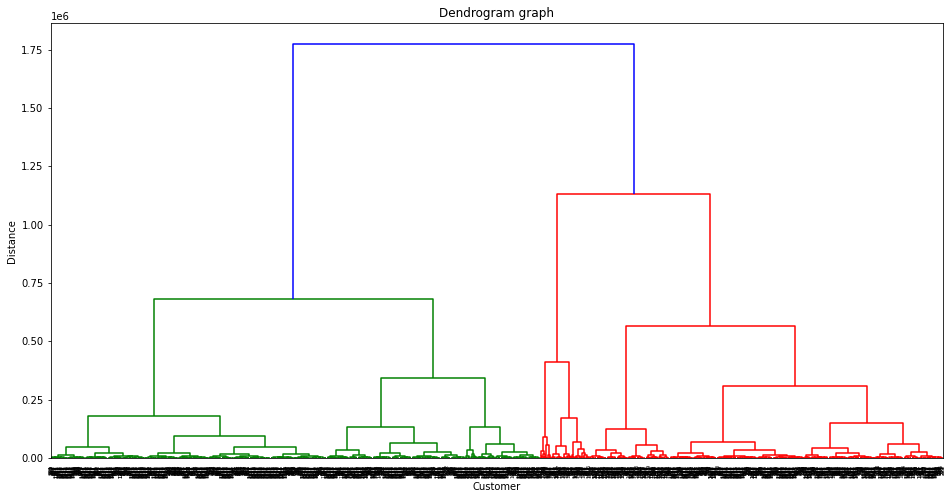

In [11]:
import scipy.cluster.hierarchy as clust

plt.figure(1, figsize=(16, 8))
dendrogram = clust.dendrogram(clust.linkage(df, method='ward'))

plt.title("Dendrogram graph")
plt.xlabel("Customer")
plt.ylabel("Distance")
plt.show()

Fitting Hierarchical clustering with n=5

In [46]:
from sklearn.cluster import AgglomerativeClustering


# affinity: default='euclidean' - 'euclidean', 'l1', 'l2', 'manhattan', 'cosine', or 'precomputed
# linkage{‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’
model = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
y_means = model.fit_predict(df)
y_means

array([2, 2, 1, ..., 1, 3, 1])

## Vizualizing the numbers of the *clusters*




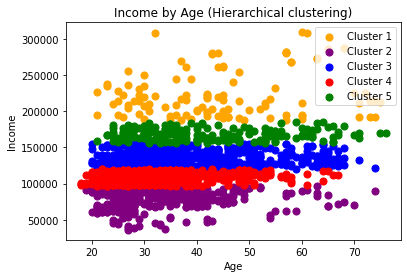

In [47]:
X = df.iloc[:,[3,5]].values
plt.scatter(X[y_means == 0,0], X[y_means == 0,1], s=50, c='orange', label='Cluster 1')
plt.scatter(X[y_means == 1,0], X[y_means == 1,1], s=50, c='purple', label='Cluster 2')
plt.scatter(X[y_means == 2,0], X[y_means == 2,1], s=50, c='blue', label='Cluster 3')
plt.scatter(X[y_means == 3,0], X[y_means == 3,1], s=50, c='red', label='Cluster 4')
plt.scatter(X[y_means == 4,0], X[y_means == 4,1], s=50, c='green', label='Cluster 5')
plt.title("Income by Age (Hierarchical clustering)")
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()